# Imports

In [2]:
from imports import *
import acquire as acq
import prepare as prep

%matplotlib inline

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")


# Pull, prepare, impute and split

In [3]:
tidy_data=prep.prep_telco()

prepping telco
Using cached csv


In [4]:
train=tidy_data[0]
train.head(10)

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,fios,contract_one_year,contract_two_year,pay_auto_cc,pay_e_check,pay_mail
0,1,38,95.00,3591.25,0,1,0,1,1,1,1,0,0,0,1,0,1,1,0,1,0,0
1,1,2,70.35,139.05,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,11,19.95,214.75,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,10,86.05,834.10,1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0
4,0,43,60.00,2548.55,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0
5,0,44,19.60,780.25,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,1,1,45.10,45.10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,4,19.55,68.80,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8,0,48,20.05,1036.00,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
9,0,55,96.80,5283.95,1,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   senior_citizen     4225 non-null   int64  
 1   tenure             4225 non-null   int64  
 2   monthly_charges    4225 non-null   float64
 3   total_charges      4225 non-null   float64
 4   male               4225 non-null   uint8  
 5   partner            4225 non-null   uint8  
 6   dependents         4225 non-null   uint8  
 7   phone_service      4225 non-null   uint8  
 8   multiple_lines     4225 non-null   uint8  
 9   online_security    4225 non-null   uint8  
 10  online_backup      4225 non-null   uint8  
 11  device_protection  4225 non-null   uint8  
 12  tech_support       4225 non-null   uint8  
 13  streaming_tv       4225 non-null   uint8  
 14  streaming_movies   4225 non-null   uint8  
 15  paperless_billing  4225 non-null   uint8  
 16  fios               4225 

# Visualize

In [5]:
telco=acq.get_telco_data()
telco.drop_duplicates(inplace=True)
telco.total_charges.replace(to_replace=[' ',''],value=np.nan,inplace=True)
telco['total_charges']=telco.total_charges.astype('float')
telco.drop(['customer_id','payment_type_id','contract_type_id','internet_service_type_id'],axis=1,inplace=True)

Using cached csv


In [44]:
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,DSL,One year,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,DSL,Month-to-month,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Fiber optic,Month-to-month,Mailed check


## univariate

<Figure size 4800x2700 with 0 Axes>

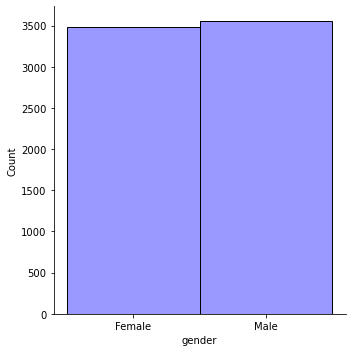

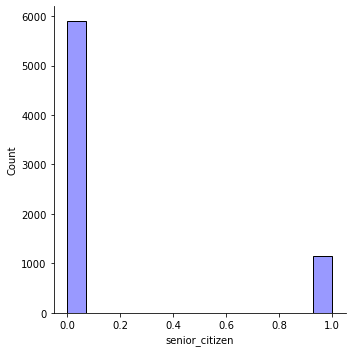

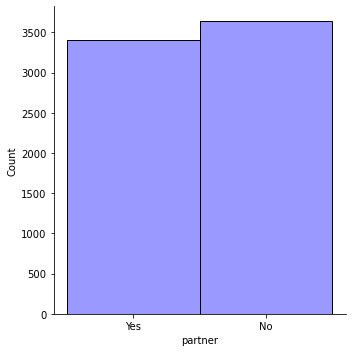

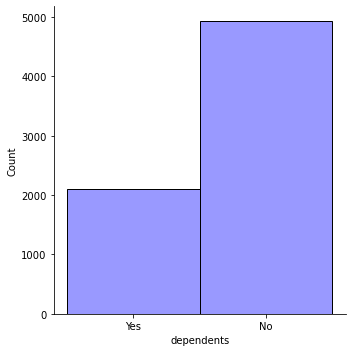

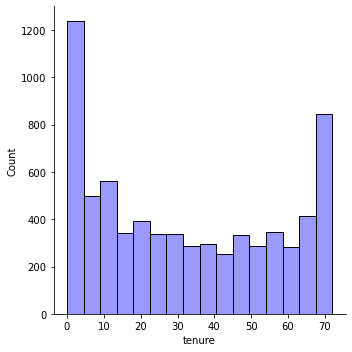

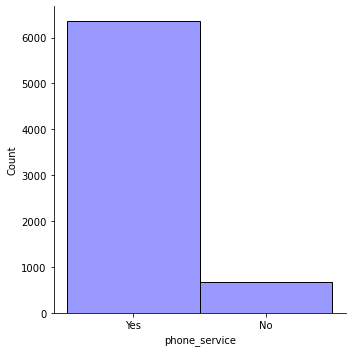

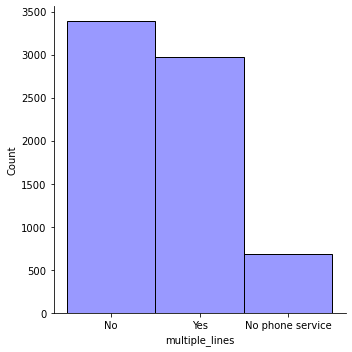

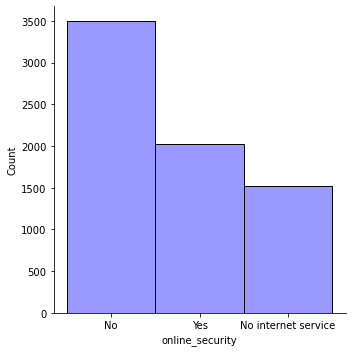

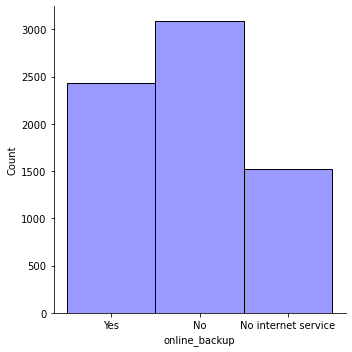

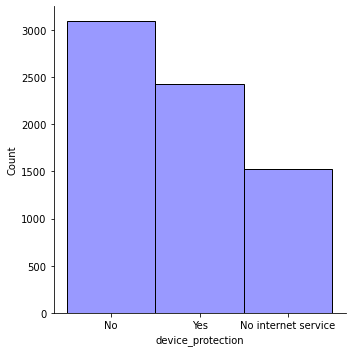

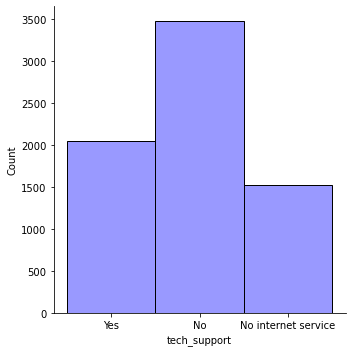

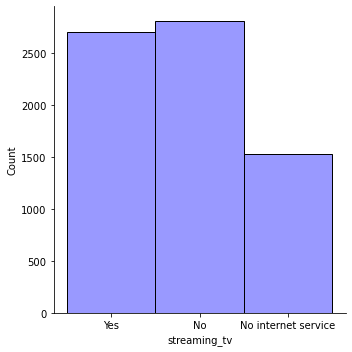

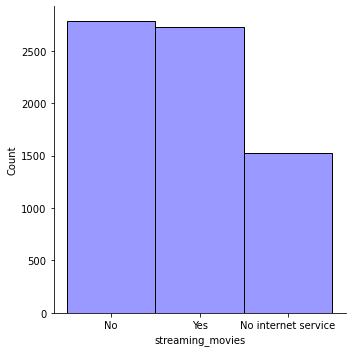

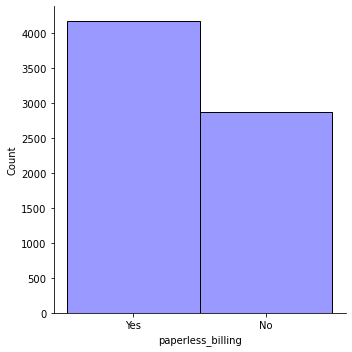

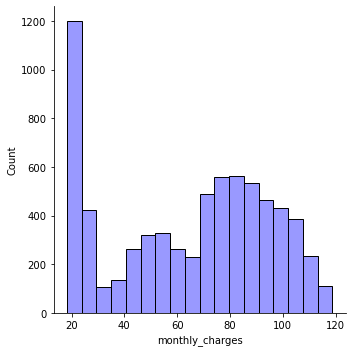

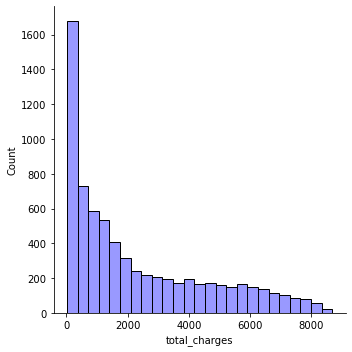

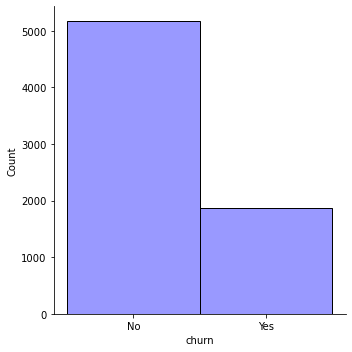

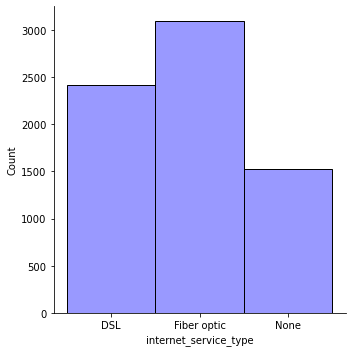

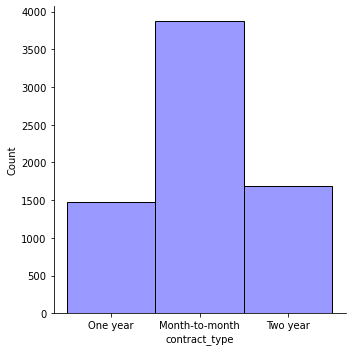

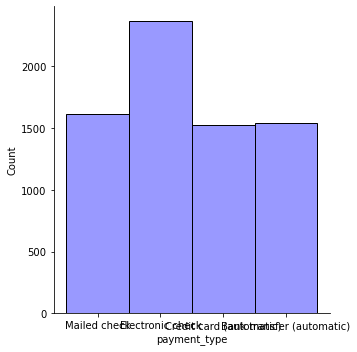

In [6]:
plt.figure(figsize=(16, 9), dpi=300)
_=[sns.displot(data=telco,x=c,color='blue',alpha=0.4)for c in telco.columns]
plt.show()

## bivariate

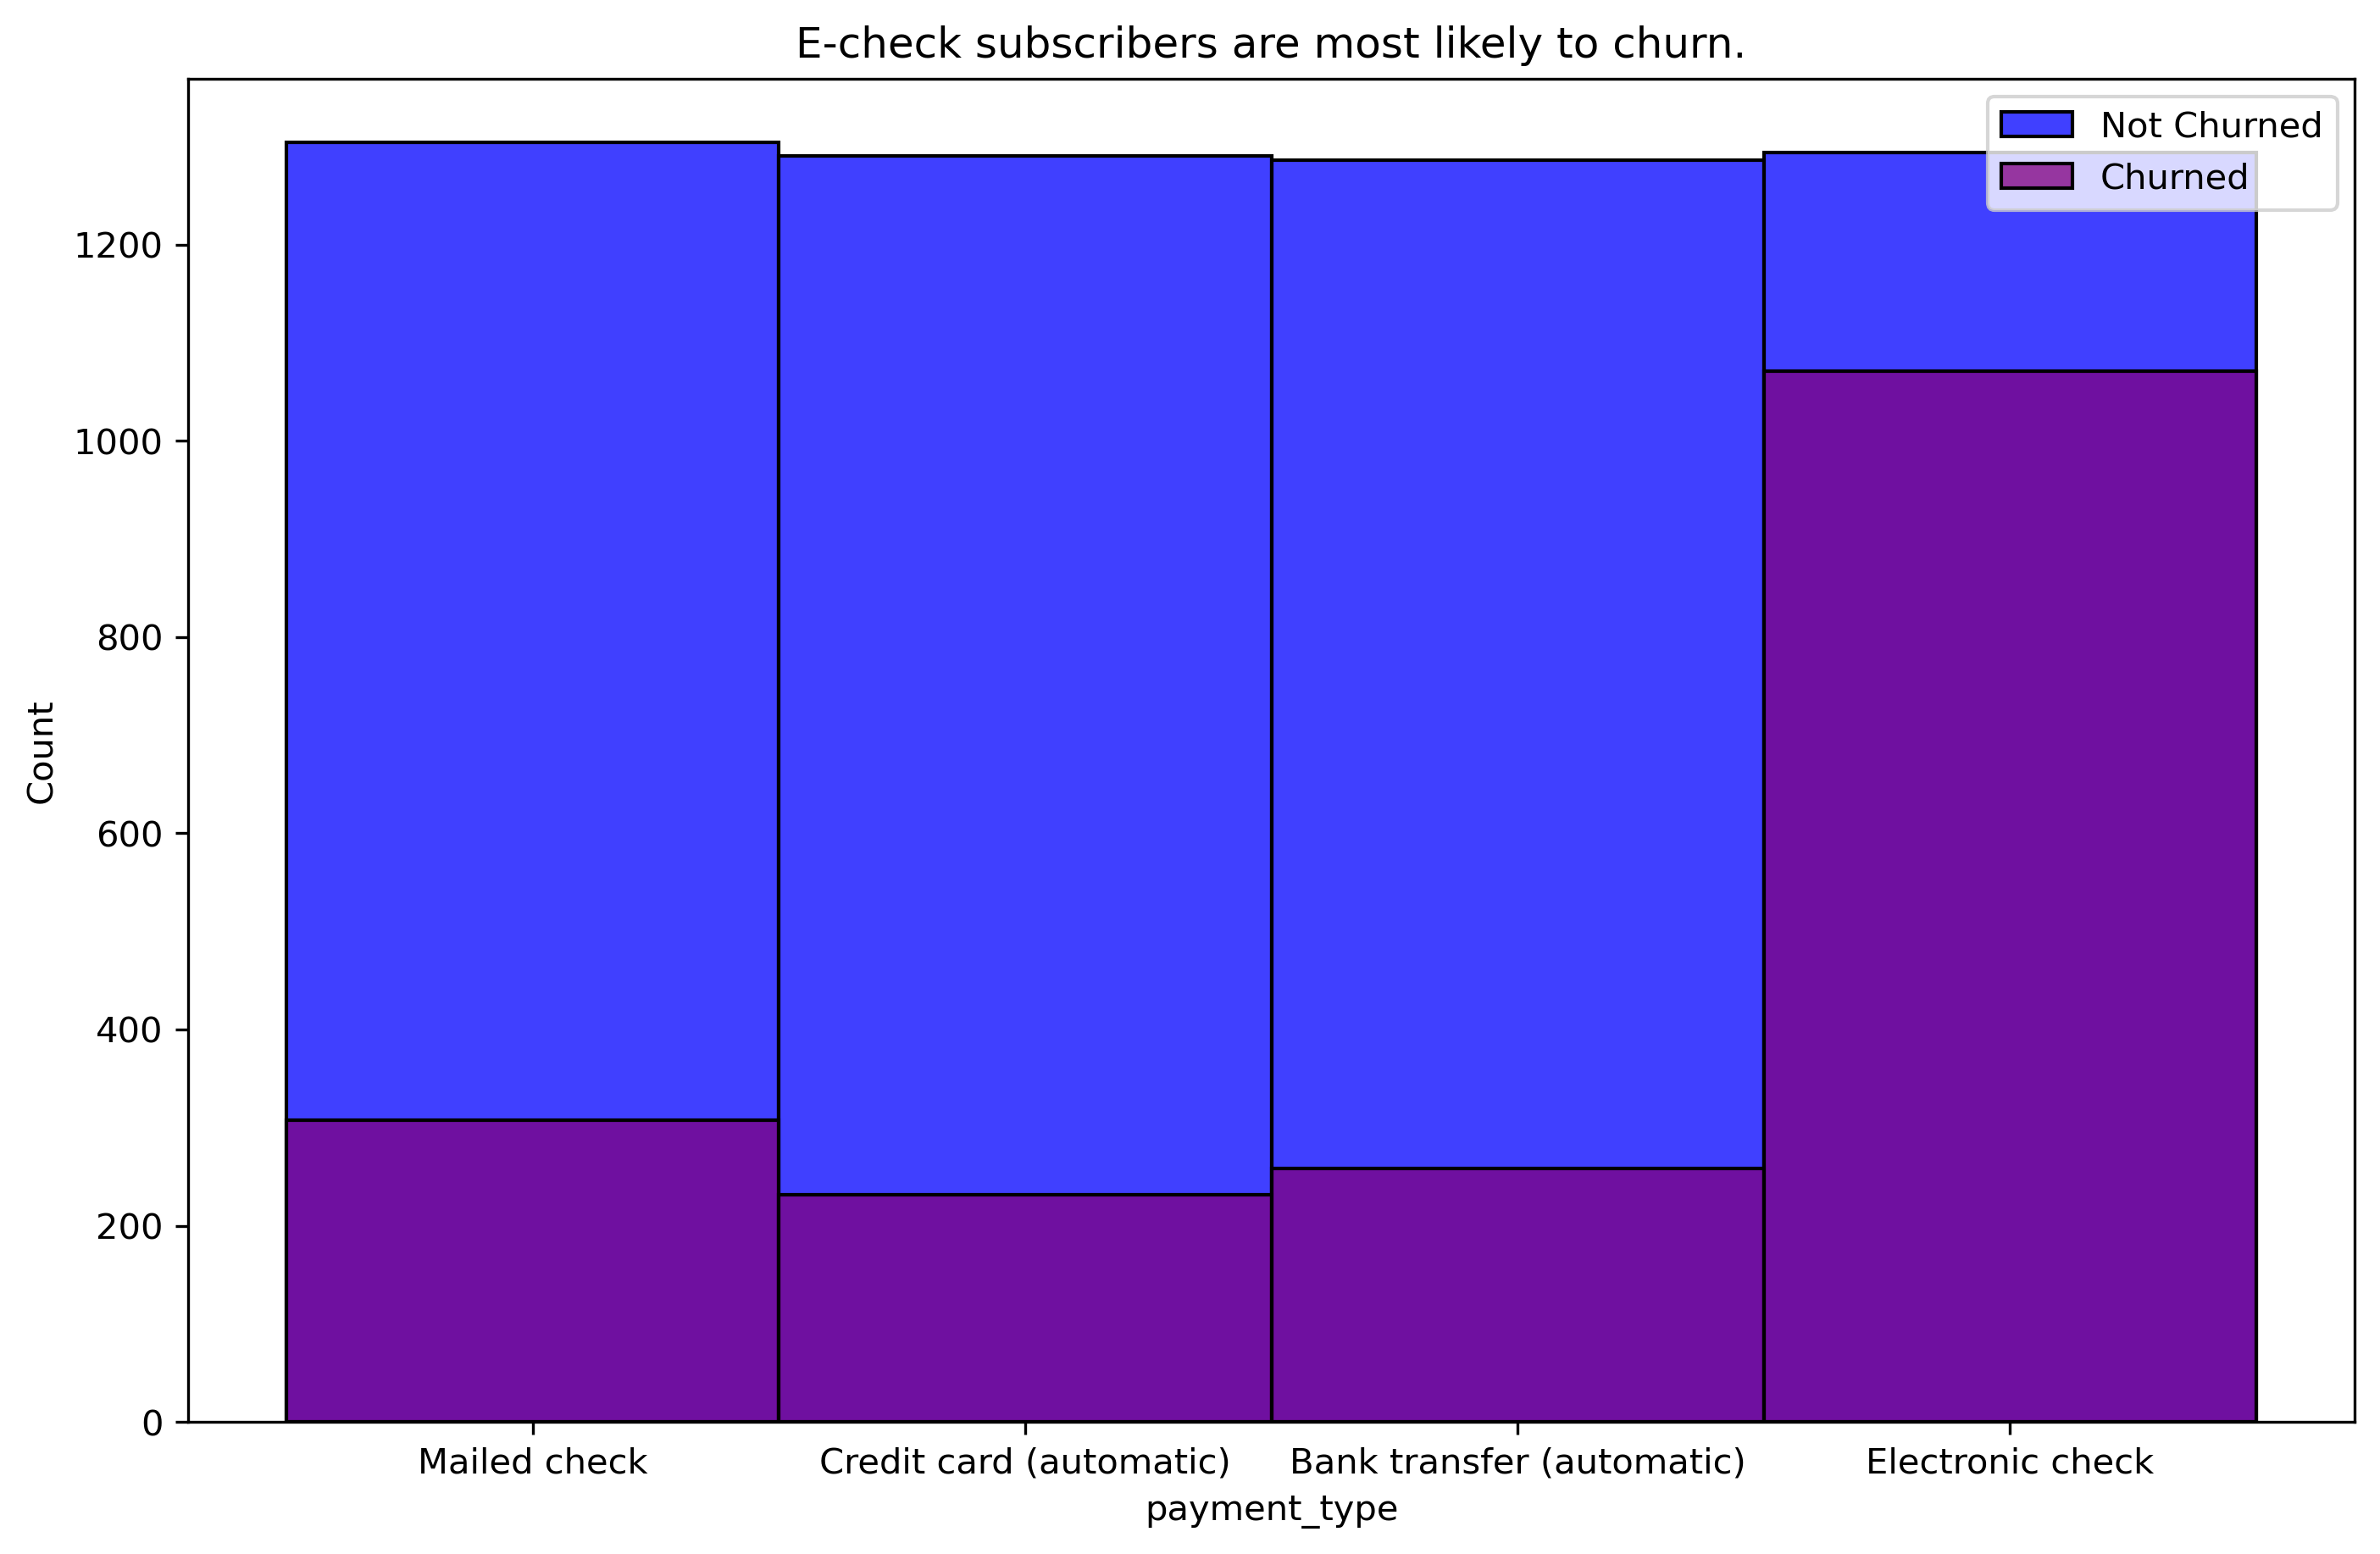

In [101]:
churned = telco[telco.churn == 'Yes']
not_churned = telco[telco.churn == 'No']

plt.figure(figsize=(11,7), dpi=300)
sns.histplot(data = not_churned.payment_type, label = 'Not Churned', color = 'blue')
sns.histplot(data = churned.payment_type, label = 'Churned', color = 'purple')
plt.title('E-check subscribers are most likely to churn.')
plt.legend();

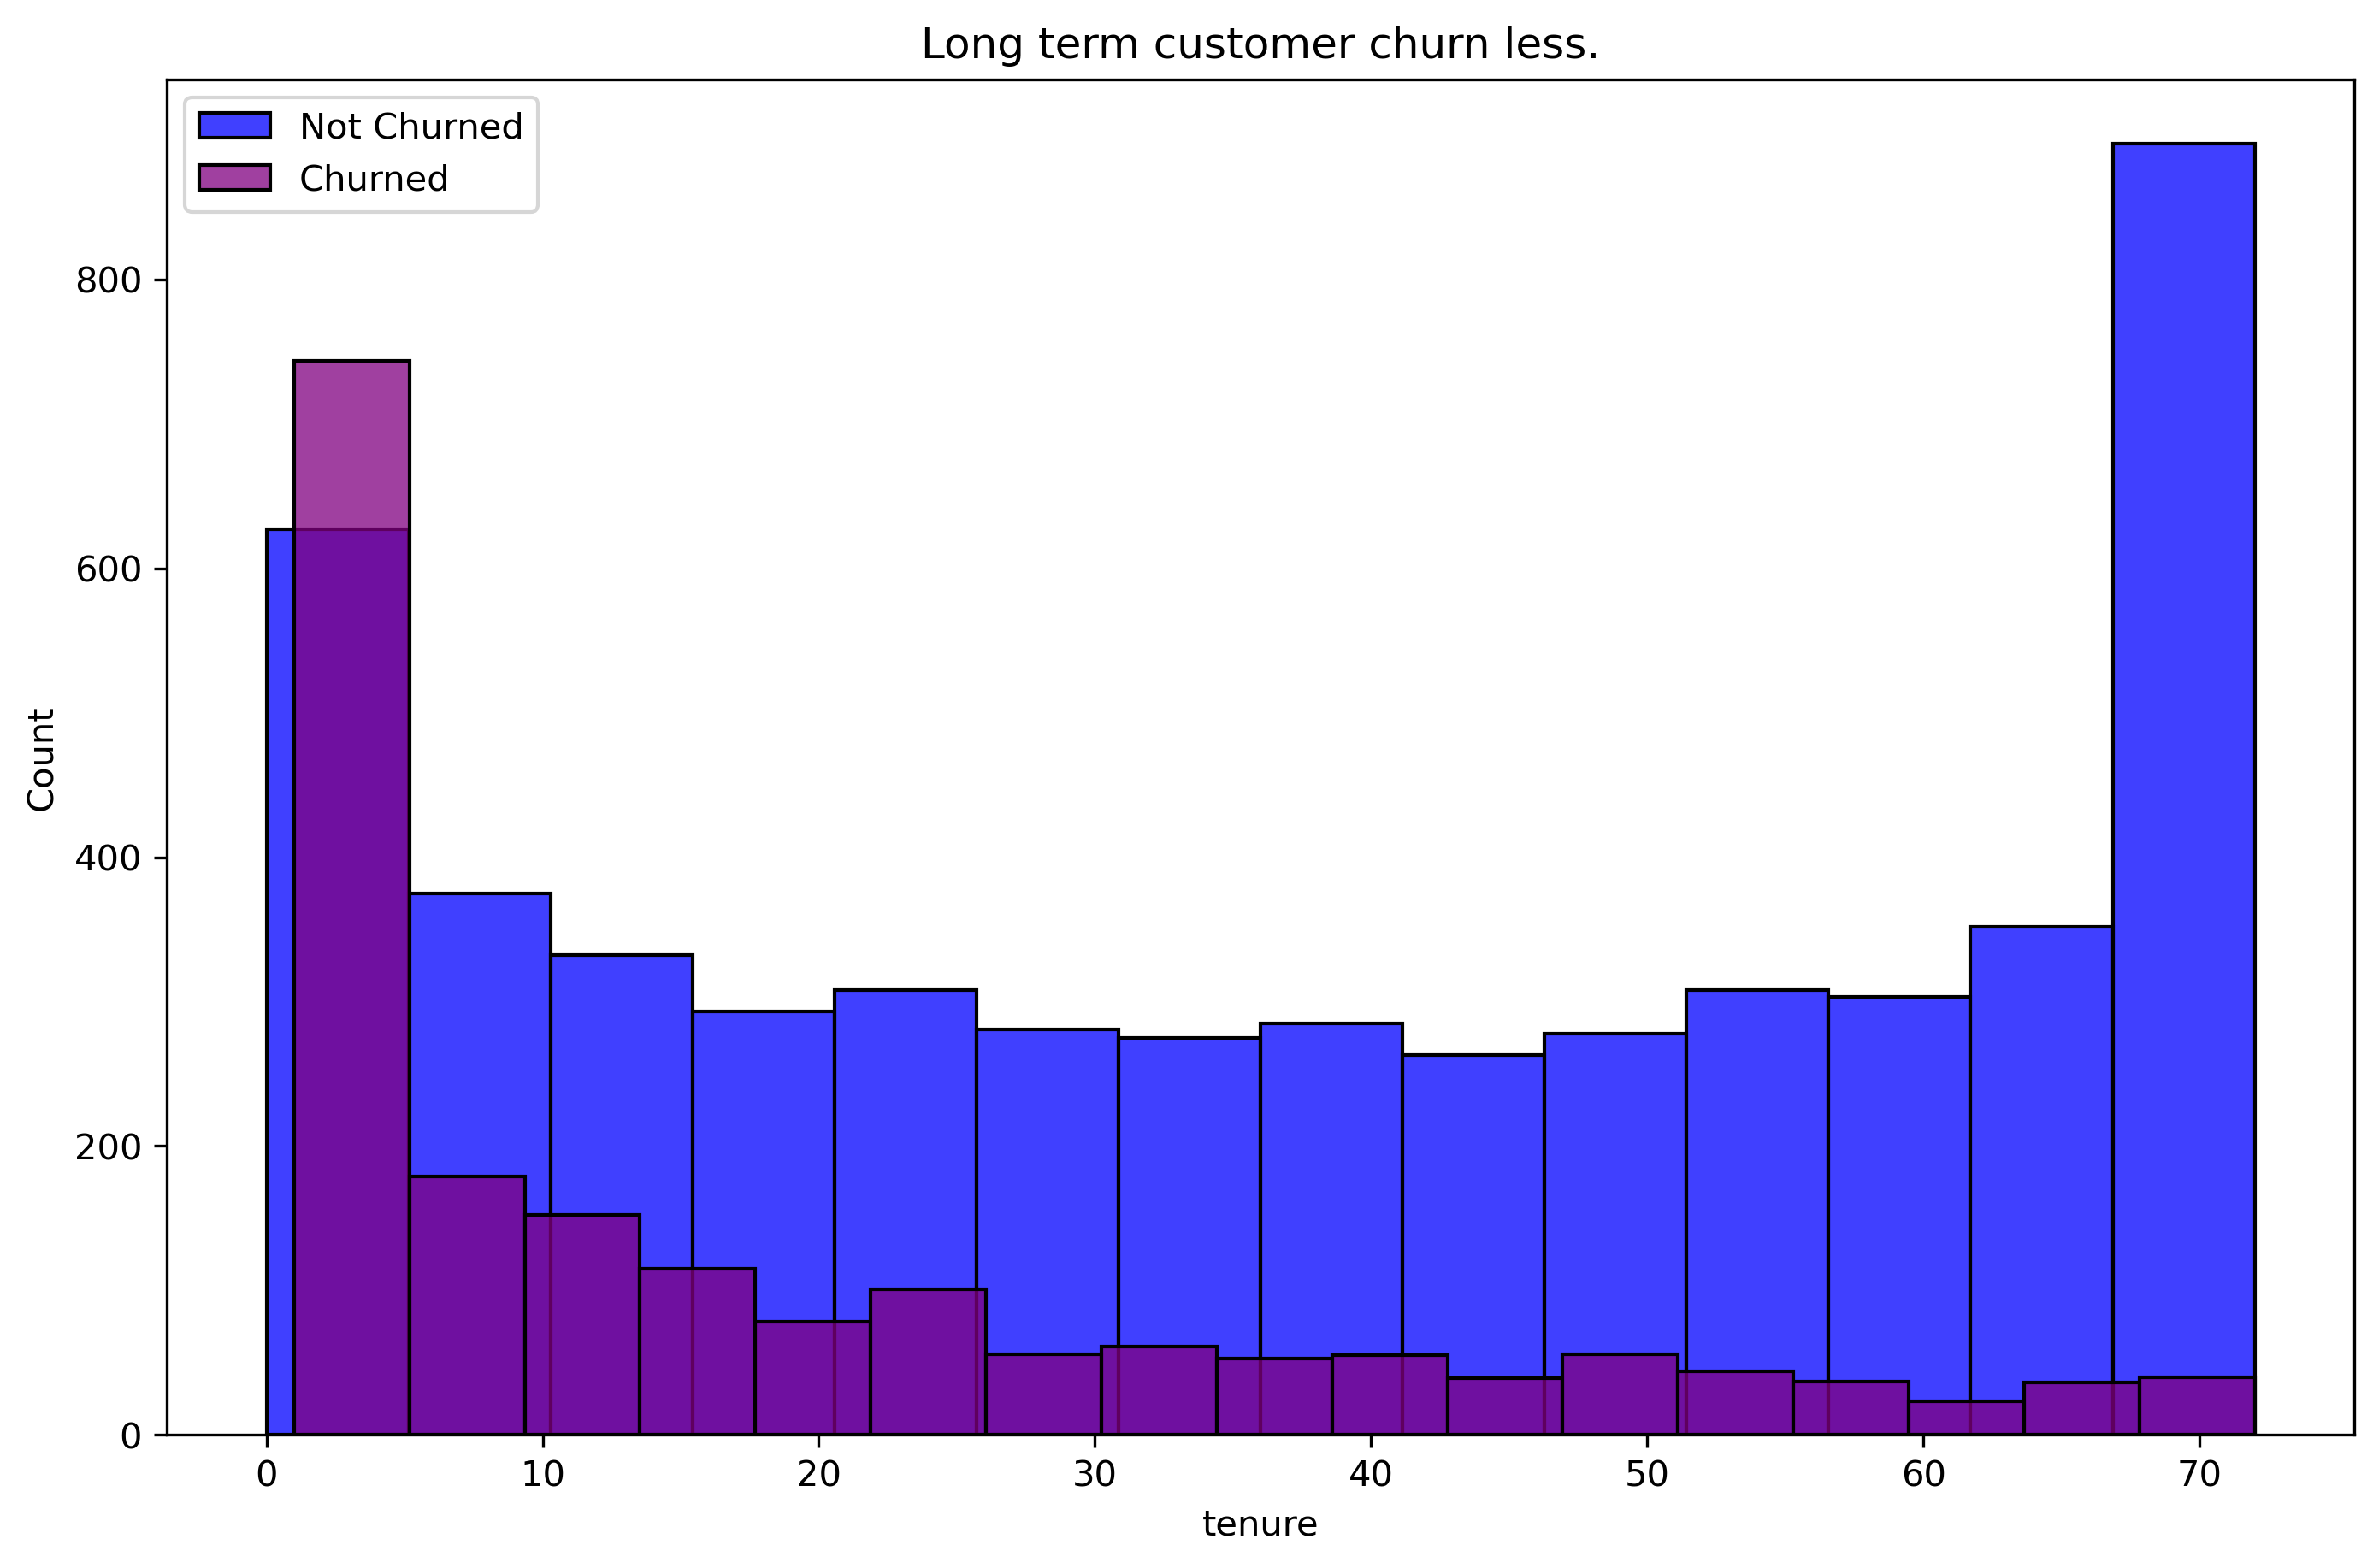

In [103]:
churned = telco[telco.churn == 'Yes']
not_churned = telco[telco.churn == 'No']

plt.figure(figsize=(11,7), dpi=300)
sns.histplot(data = not_churned.tenure, label = 'Not Churned', color = 'blue')
sns.histplot(data = churned.tenure, label = 'Churned', color = 'purple')
plt.title('Long term customer churn less.')
plt.legend();

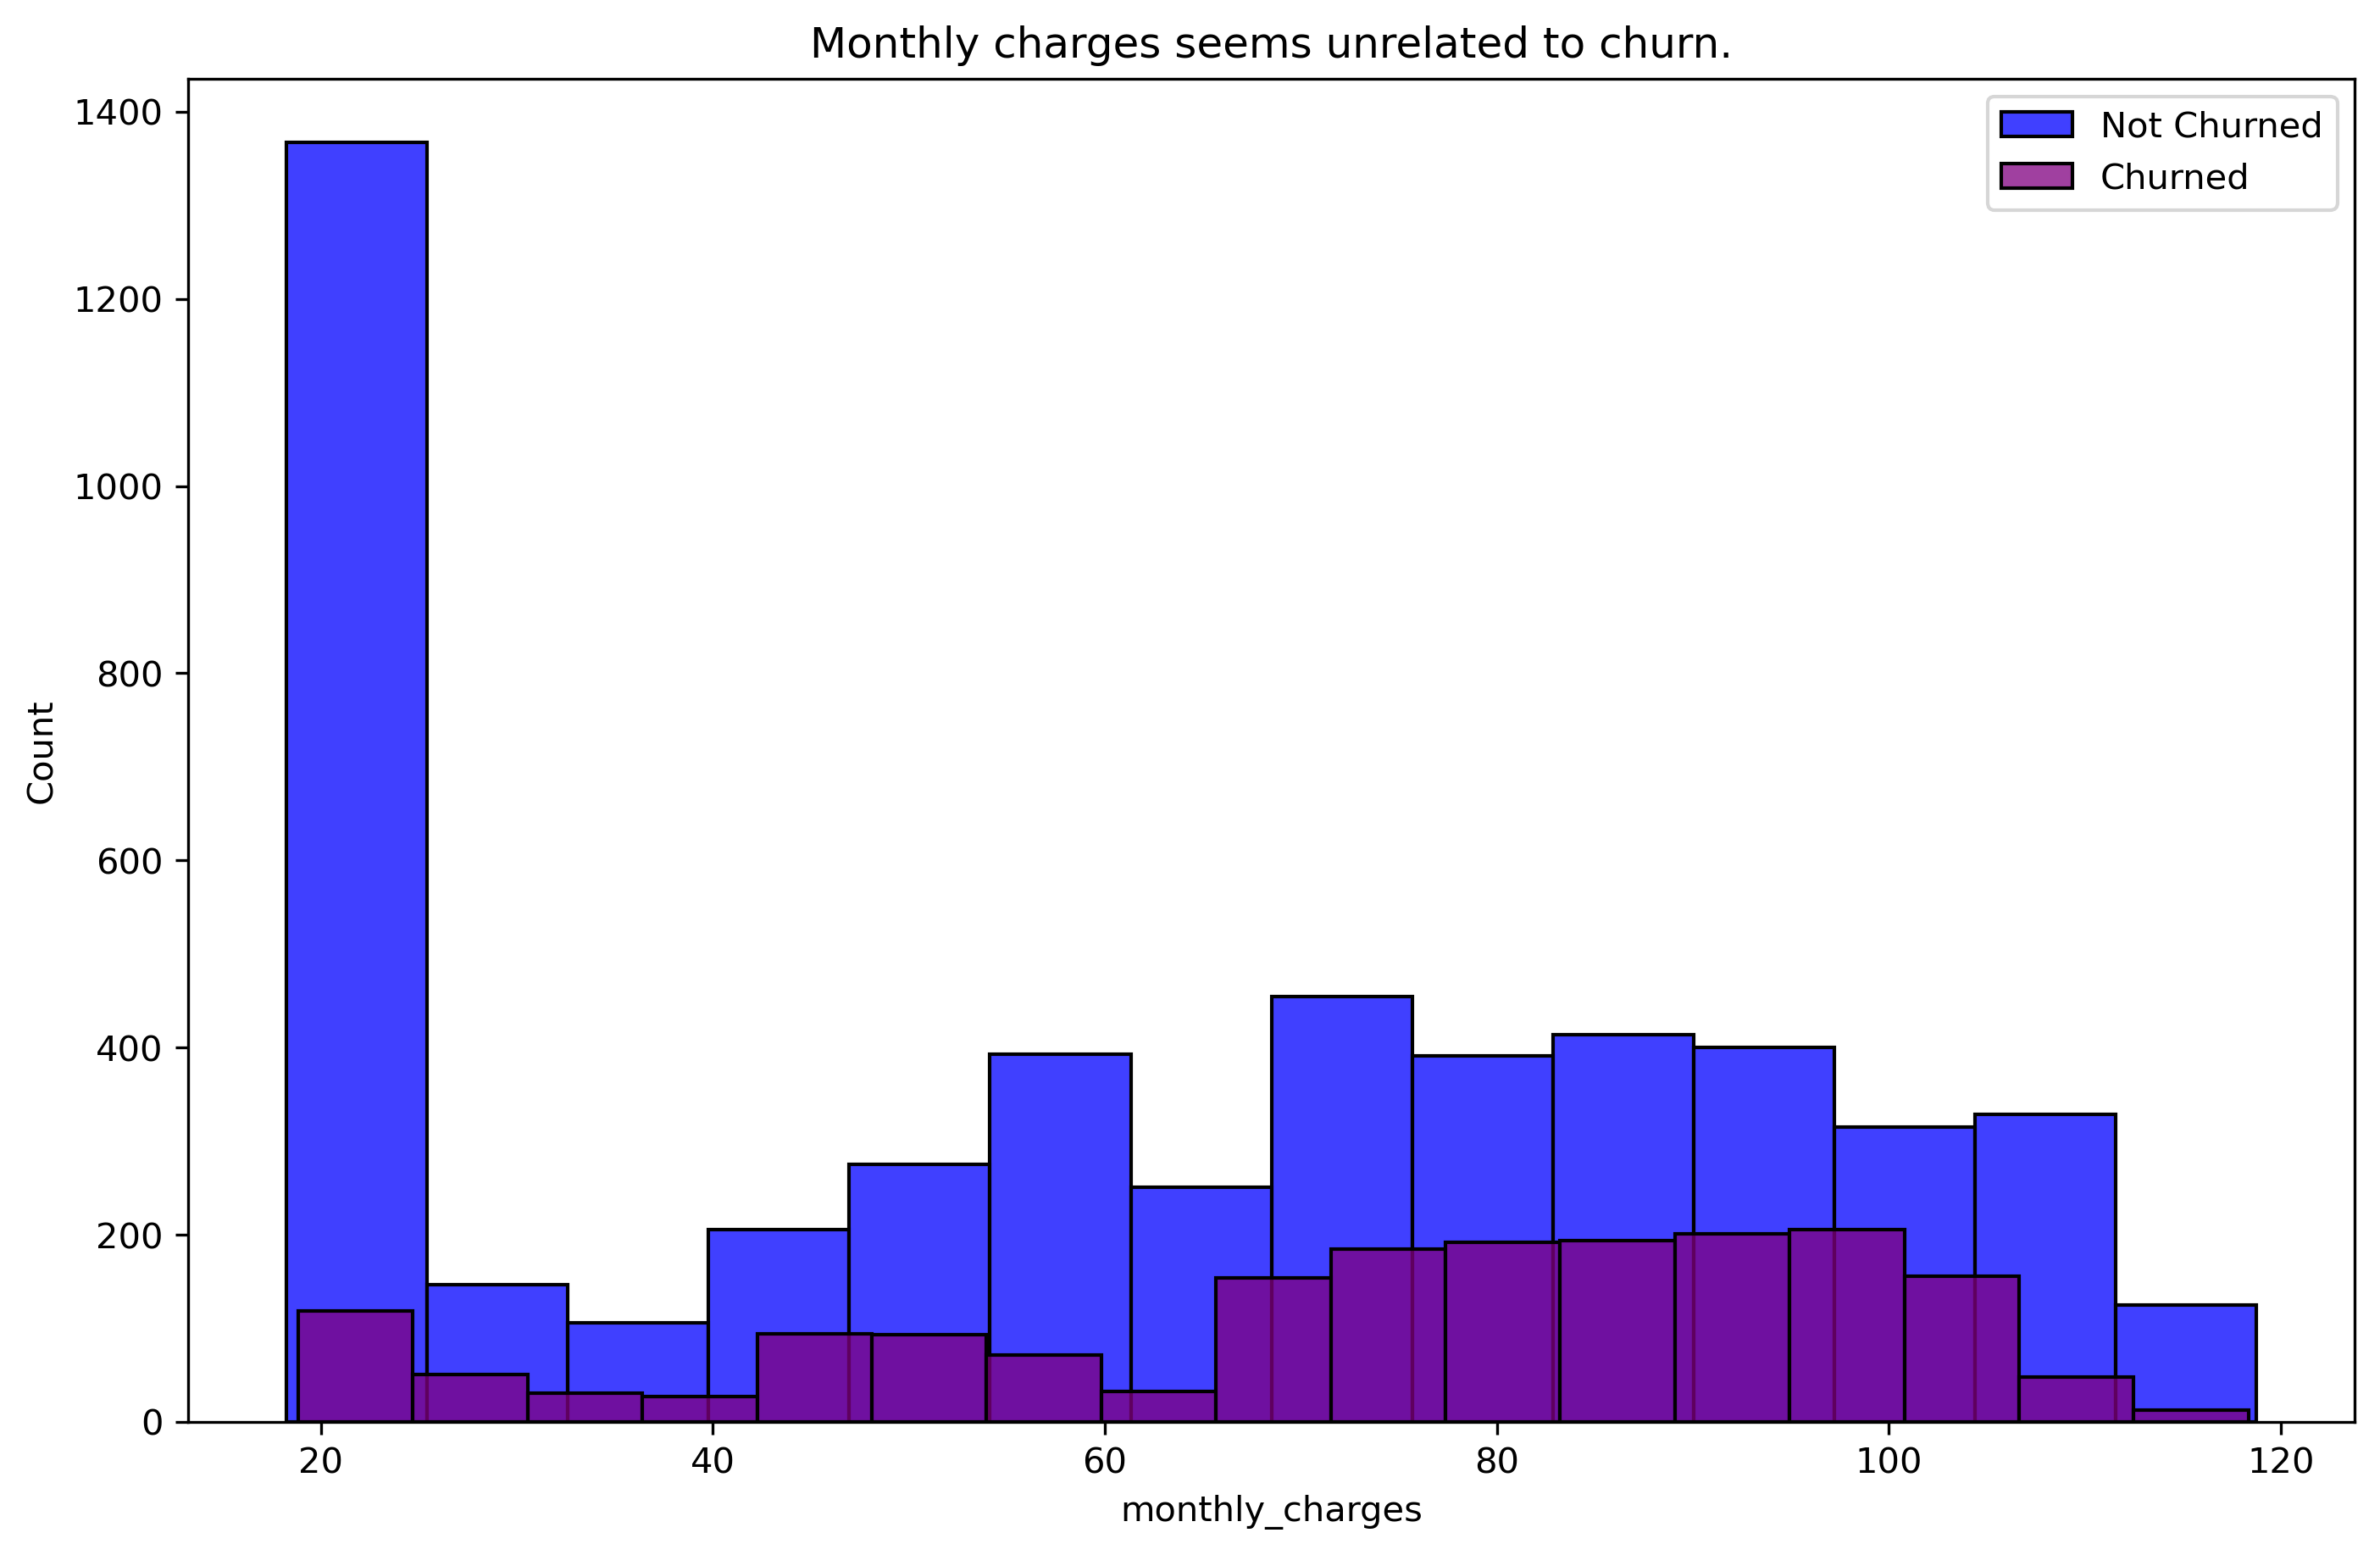

In [104]:
churned = telco[telco.churn == 'Yes']
not_churned = telco[telco.churn == 'No']

plt.figure(figsize=(11,7), dpi=300)
sns.histplot(data = not_churned.monthly_charges, label = 'Not Churned', color = 'blue')
sns.histplot(data = churned.monthly_charges, label = 'Churned', color = 'purple')
plt.title('Monthly charges seems unrelated to churn.')
plt.legend();

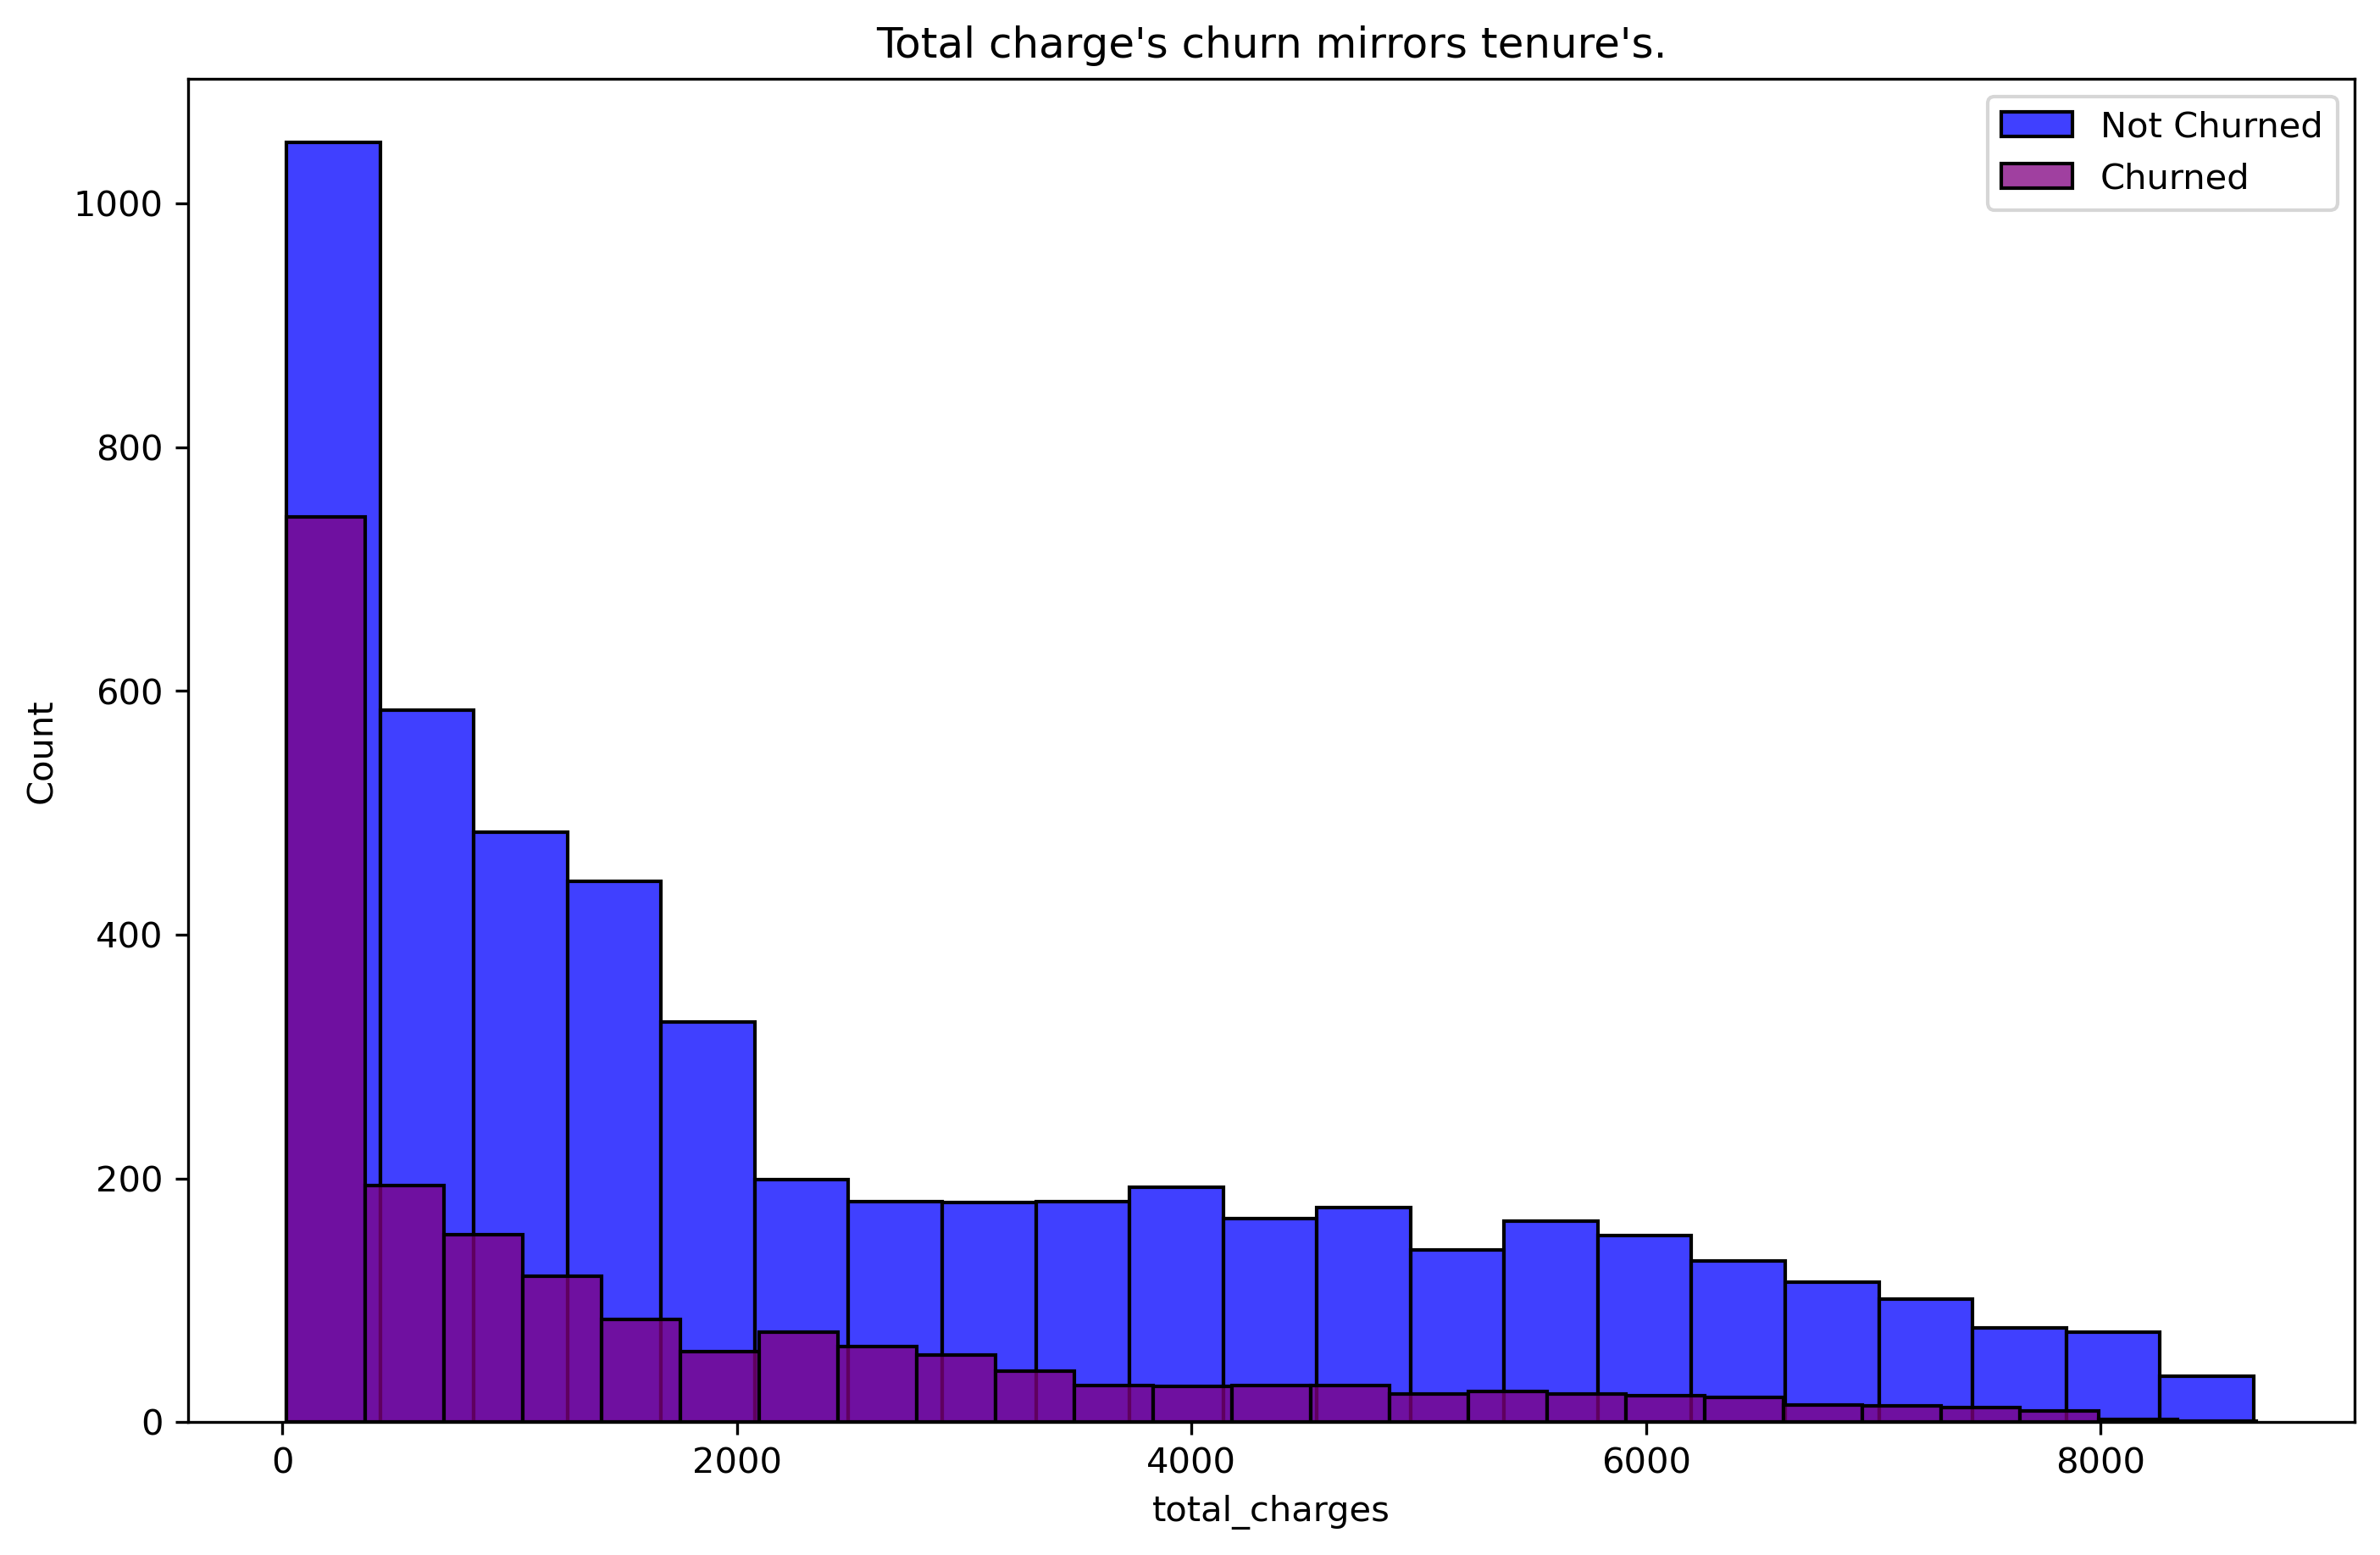

In [8]:
churned = telco[telco.churn == 'Yes']
not_churned = telco[telco.churn == 'No']

plt.figure(figsize=(11,7), dpi=300)
sns.histplot(data = not_churned.total_charges, label = 'Not Churned', color = 'blue')
sns.histplot(data = churned.total_charges, label = 'Churned', color = 'purple')
plt.title("Total charge's churn mirrors tenure's.")
plt.legend();

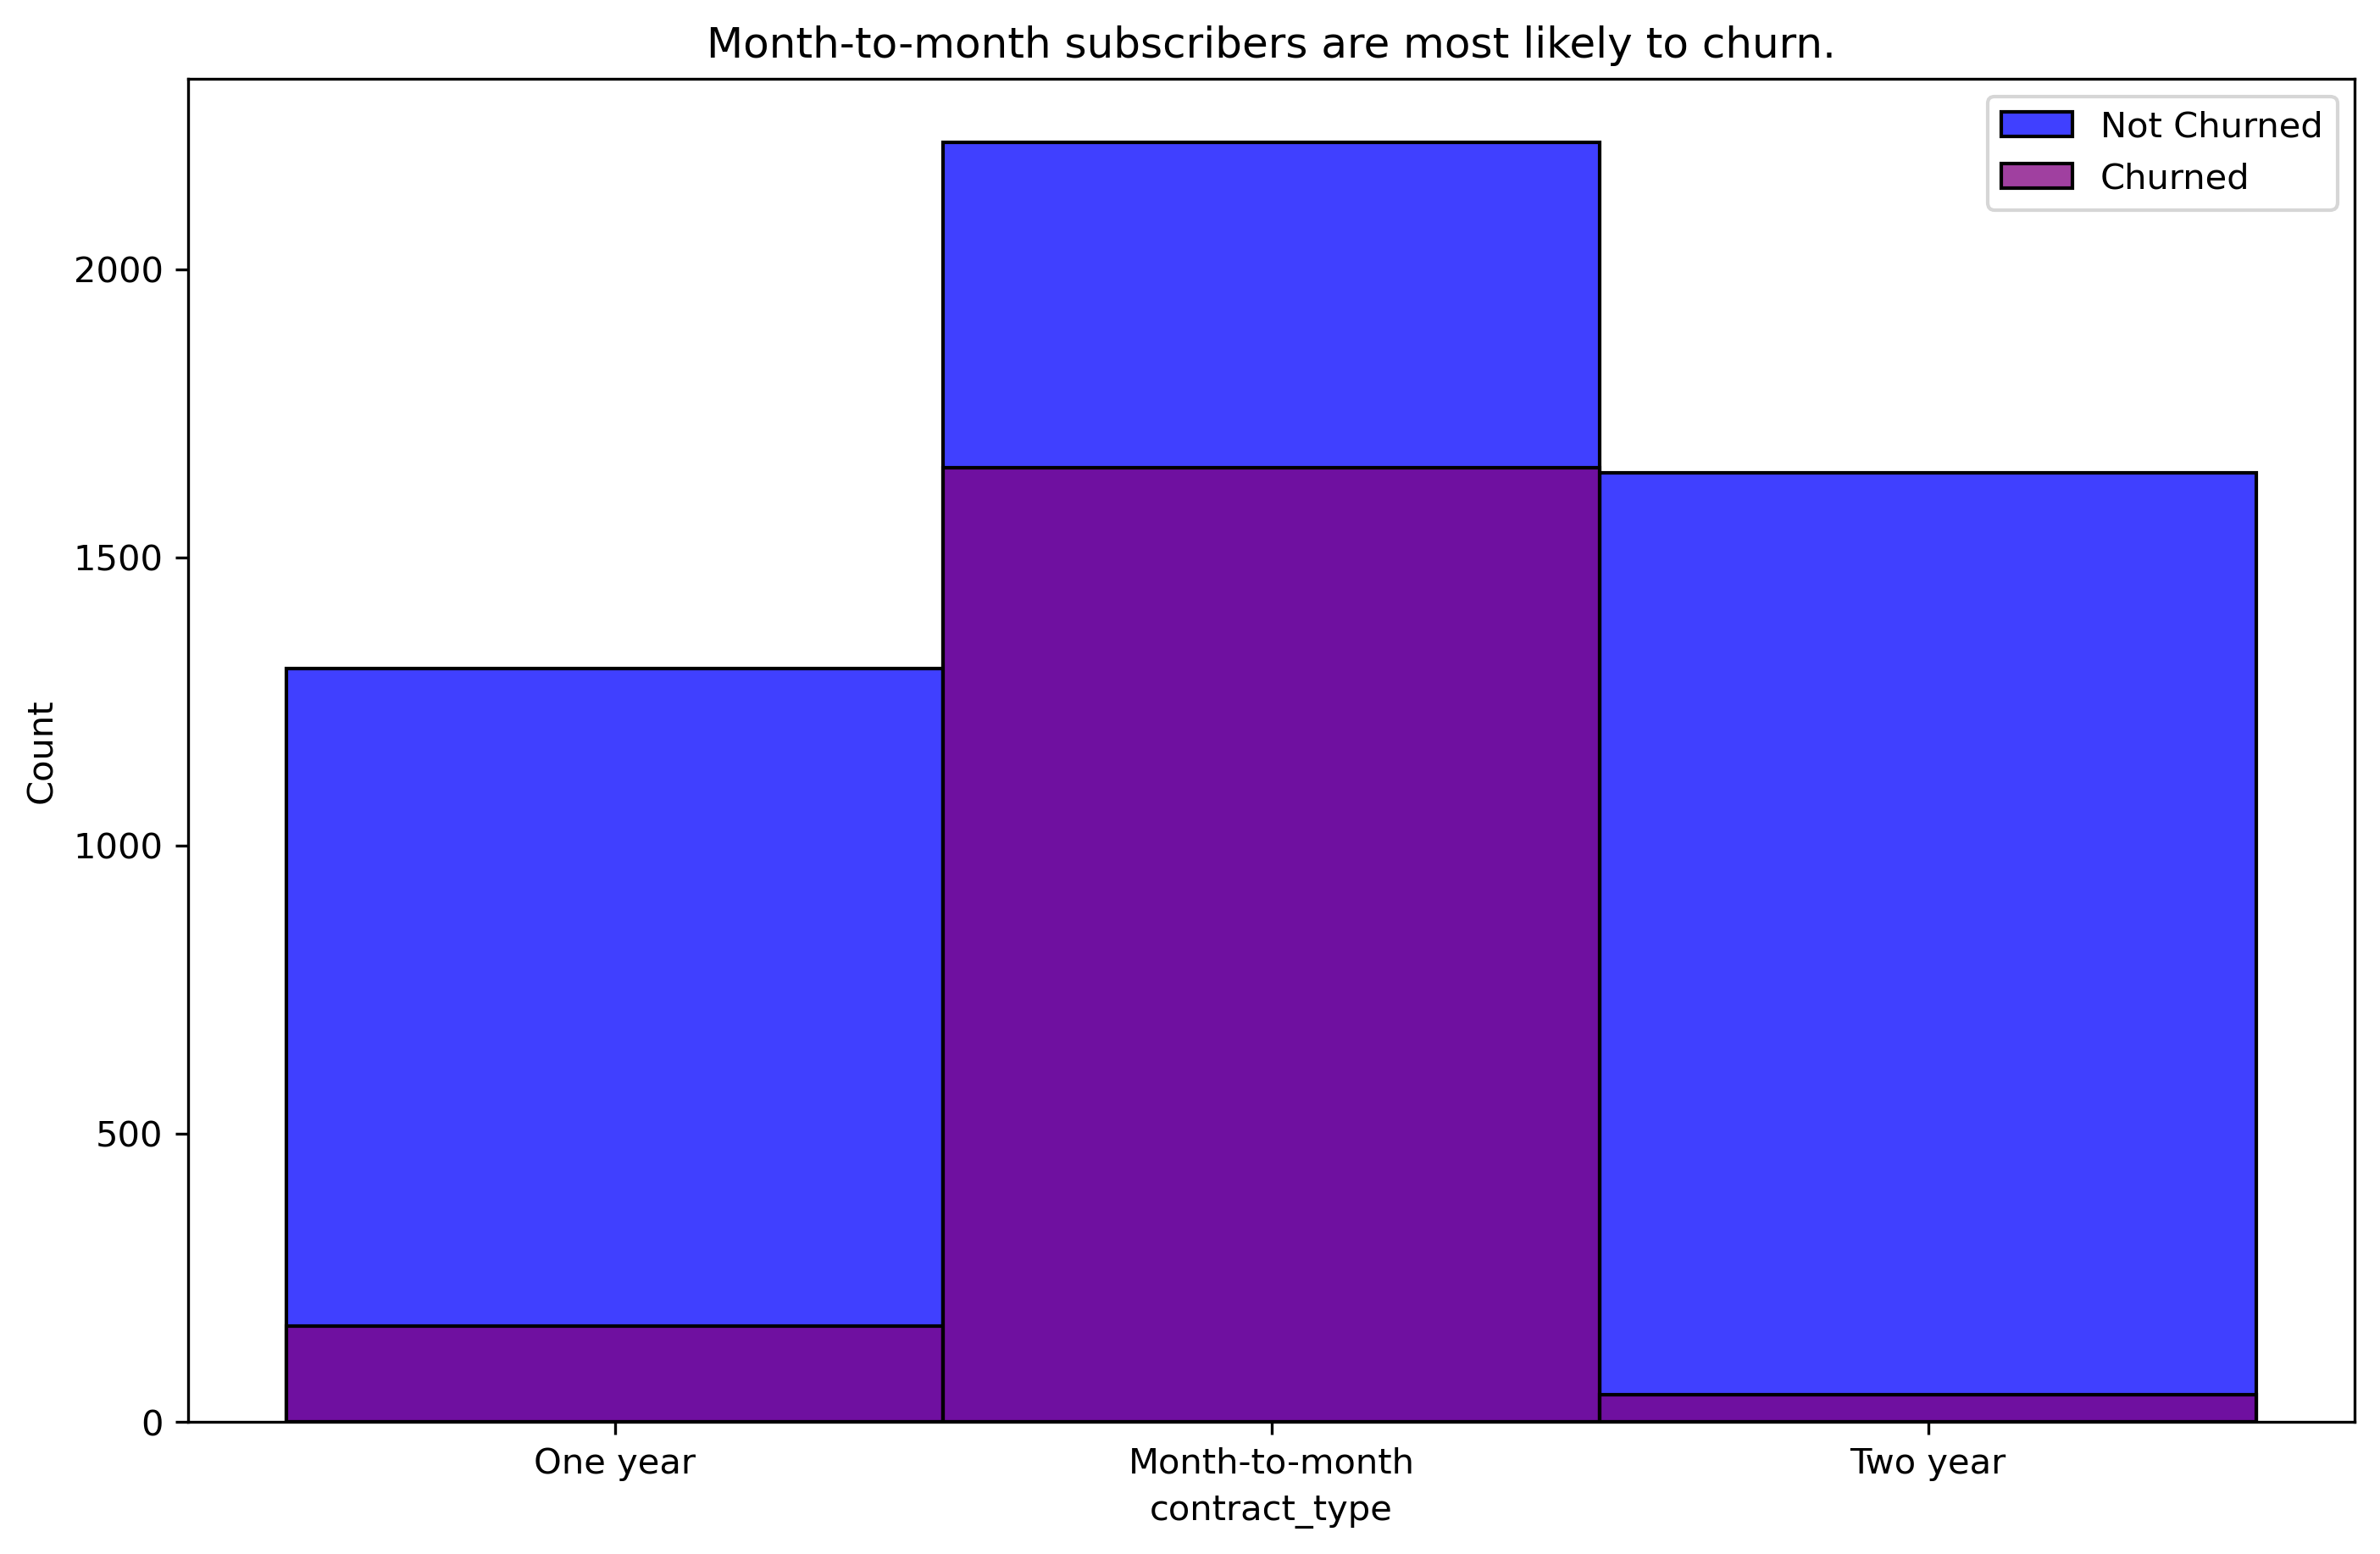

In [107]:
churned = telco[telco.churn == 'Yes']
not_churned = telco[telco.churn == 'No']

plt.figure(figsize=(11,7), dpi=300)
sns.histplot(data = not_churned.contract_type, label = 'Not Churned', color = 'blue')
sns.histplot(data = churned.contract_type, label = 'Churned', color = 'purple')
plt.title("Month-to-month subscribers are most likely to churn.")
plt.legend();

multivariate